In [16]:
import pandas as pd
import gdown

In [20]:
# URL corregida (con uc?id=)
url_aisle = "https://drive.google.com/uc?id=1pxWIx_32NdXN7t7r8axTDD0FWIAiHFw0"
url_departments = "https://drive.google.com/uc?id=1gMlH8PfLB5b8eVV1QuXI71GaxwpV_4EA"
url_orders = "https://drive.google.com/uc?id=1qR3CfKei5kacImYQz7x0xAypO4sm5H5O"
url_orders_products_prior = "https://drive.google.com/uc?id=1nzd1C2Cc00854bDo7JznkIh9Q0zwIqyv"
url_orders_products_train = "https://drive.google.com/uc?id=1vwOFeI8XWhe_ZlMb_r81jGwD0OKt8a2w"
url_products = "https://drive.google.com/uc?id=1--mja_wkttg8BFLBxvQhxJ_jIAw1_9B3"


# Descargar el archivo como aisles.csv
gdown.download(url_aisle, r'data\aisles.csv', quiet=False)
gdown.download(url_departments, r'data\departments.csv', quiet=False)
gdown.download(url_orders, r'data\orders.csv', quiet=False)
gdown.download(url_orders_products_prior, r'data\order_products__prior.csv', quiet=False)
gdown.download(url_orders_products_train, r'data\order_products__train.csv', quiet=False)
gdown.download(url_products, r'data\products.csv', quiet=False)

# Leer el CSV
df_aisles = pd.read_csv(r'data\aisles.csv')
df_departments = pd.read_csv(r'data\departments.csv')
df_orders = pd.read_csv(r'data\orders.csv')
df_order_products_prior = pd.read_csv(r'data\order_products__prior.csv')
df_order_products_train = pd.read_csv(r'data\order_products__train.csv')
df_products = pd.read_csv(r'data\products.csv')

Downloading...
From: https://drive.google.com/uc?id=1pxWIx_32NdXN7t7r8axTDD0FWIAiHFw0
To: c:\Users\joant\OneDrive\Stucom\MasterIA\BigData\Proyecto4---Recommendation\data\aisles.csv
100%|██████████| 2.60k/2.60k [00:00<?, ?B/s]
Downloading...
From: https://drive.google.com/uc?id=1gMlH8PfLB5b8eVV1QuXI71GaxwpV_4EA
To: c:\Users\joant\OneDrive\Stucom\MasterIA\BigData\Proyecto4---Recommendation\data\departments.csv
100%|██████████| 270/270 [00:00<?, ?B/s] 
Downloading...
From (original): https://drive.google.com/uc?id=1qR3CfKei5kacImYQz7x0xAypO4sm5H5O
From (redirected): https://drive.google.com/uc?id=1qR3CfKei5kacImYQz7x0xAypO4sm5H5O&confirm=t&uuid=560a18a3-20a2-439a-bfd2-4e00d621f0d1
To: c:\Users\joant\OneDrive\Stucom\MasterIA\BigData\Proyecto4---Recommendation\data\orders.csv
100%|██████████| 109M/109M [00:07<00:00, 14.6MB/s] 
Downloading...
From (original): https://drive.google.com/uc?id=1nzd1C2Cc00854bDo7JznkIh9Q0zwIqyv
From (redirected): https://drive.google.com/uc?id=1nzd1C2Cc00854bDo7J

In [23]:
print(df_order_products_prior.columns,"\n")
print(df_order_products_train.columns,"\n")
print(df_orders.columns,"\n")
print(df_departments.columns,"\n")
print(df_aisles.columns,"\n")
print(df_products.columns,"\n")

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered'], dtype='object') 

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered'], dtype='object') 

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order'],
      dtype='object') 

Index(['department_id', 'department'], dtype='object') 

Index(['aisle_id', 'aisle'], dtype='object') 

Index(['product_id', 'product_name', 'aisle_id', 'department_id'], dtype='object') 



In [24]:
df_orders.shape

(3421083, 7)

In [ ]:
print(df_order_products_prior.columns,"\n")
print(df_order_products_train.columns,"\n")
print(df_orders.columns,"\n")
print(df_departments.columns,"\n")
print(df_aisles.columns,"\n")
print(df_products.columns,"\n")

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64 

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64 

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64 

department_id    0
department       0
dtype: int64 

aisle_id    0
aisle       0
dtype: int64 

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64 



In [ ]:
df = pd.DataFrame(data=df_orders['user_id'].unique(), columns=['user_id'])
df.to_csv(r"C:\Users\joant\Downloads\users.csv", index=False)

PARA LOS NULOS de days_since_prior_order
SI UN CLIENTE TIENE MAS DE UN PEDIDO Y TIENE nan SE ELIMINA EL nan
SI UN CLIENTE TIENE UN SOLO PEDIDO Y ES nan SE SUBSTITUYE POR 0

In [ ]:
import pandas as pd

# Suponiendo que ya tienes el DataFrame cargado como 'orders_df'
# orders_df = pd.read_csv('orders.csv')

# Primero, vamos a comprobar cuántos pedidos tiene cada usuario
pedido_por_usuario = df_orders.groupby('user_id')['order_id'].count()

# Ahora, aplicamos la lógica según el número de pedidos de cada cliente
for user_id, n_pedidos in pedido_por_usuario.items():
    if n_pedidos > 1:
        # Si tiene más de un pedido, eliminamos los NaN en 'days_since_prior_order' para ese usuario
        df_orders.loc[df_orders['user_id'] == user_id, 'days_since_prior_order'] = \
            df_orders.loc[df_orders['user_id'] == user_id, 'days_since_prior_order'].dropna()
    else:
        # Si tiene solo un pedido, reemplazamos el NaN por 0
        df_orders.loc[df_orders['user_id'] == user_id, 'days_since_prior_order'] = \
            df_orders.loc[df_orders['user_id'] == user_id, 'days_since_prior_order'].fillna(0)

# Ahora ya hemos manejado los valores NaN según las condiciones establecidas


In [34]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Agrupar por usuario para calcular métricas RFM
rfm = df_orders.groupby('user_id').agg({
    'order_number': 'max',  # Frecuencia (número de pedidos)
    'days_since_prior_order': 'mean'  # Recencia (promedio de días entre pedidos)
}).reset_index()

# Renombrar columnas
rfm.rename(columns={'order_number': 'frequency', 'days_since_prior_order': 'recency'}, inplace=True)

# Normalizar valores para la segmentación
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['recency', 'frequency']])

# Calcular el RFM Score (si aún no lo has hecho)
rfm['recency_score'] = rfm['recency'].rank(method='dense', ascending=False)
rfm['frequency_score'] = rfm['frequency'].rank(method='dense', ascending=True)

# Calcular el RFM total score combinando recencia y frecuencia
rfm['RFM_Score'] = rfm['recency_score'] + rfm['frequency_score']

# Definir los rangos de los segmentos utilizando np.where
rfm['Segmento'] = np.where(rfm['RFM_Score'] >= 7, 'Clientes Leales', 
                            np.where(rfm['RFM_Score'] >= 5, 'Clientes Frecuentes', 
                                     np.where(rfm['RFM_Score'] >= 3, 'Clientes Regulares', 
                                              'Clientes Perdidos')))

# Guardar el archivo CSV con los resultados
rfm.to_csv("rfm_segmented_with_ranges.csv", index=False)

print("Archivo 'rfm_segmented_with_ranges.csv' generado con éxito.")


Archivo 'rfm_segmented_with_ranges.csv' generado con éxito.


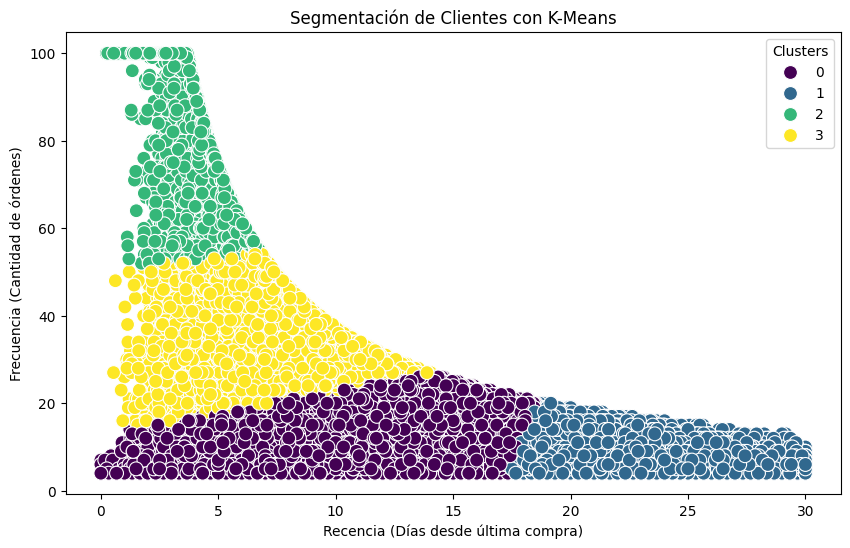

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Seleccionar características para la segmentación
X = rfm[['recency', 'frequency']]

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar K-Means con 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['cluster'] = kmeans.fit_predict(X_scaled)

# Graficar los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=rfm['recency'], y=rfm['frequency'], hue=rfm['cluster'], palette='viridis', s=100)
plt.xlabel("Recencia (Días desde última compra)")
plt.ylabel("Frecuencia (Cantidad de órdenes)")
plt.title("Segmentación de Clientes con K-Means")
plt.legend(title="Clusters")
plt.show()

rfm.to_csv("data/kmeans_segmentation.csv",index=False)
